<a href="https://colab.research.google.com/github/mam-7/CE888/blob/master/CE888_1907191_ASSIGN/INTERACTIVE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install modAL

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import numpy as np

In [ ]:
data_1 = load_breast_cancer()

In [ ]:
X=data_1['data']
y=data_1['target']

In [ ]:
#SPLIT THE DATASET, CREATE THE LABELLED AND UNLABELLED POOL FOR QUERYING
n_initial = 50
import itertools
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=False)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool = np.array(list(itertools.compress(X, [i not in initial_idx for i in range(len(X_train))])))
y_pool = np.array(list(itertools.compress(y, [i not in initial_idx for i in range(len(y_train))])))


In [ ]:
#UNCERTAINTY SAMPLING, CAN BE OUR OWN CHOICE
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [ ]:
n_queries = 10

In [ ]:
#THIS IS THE INTERACTIVE PART WHERE THE ORACLE WITH SPECIALIZED KNOWLEDGE CAN INPUT THE LABEL THEY THINK IS CORRECT
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    #display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    print (query_inst)

    print("What is the label?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))


[[1.585e+01 2.395e+01 1.037e+02 7.827e+02 8.401e-02 1.002e-01 9.938e-02
  5.364e-02 1.847e-01 5.338e-02 4.033e-01 1.078e+00 2.903e+00 3.658e+01
  9.769e-03 3.126e-02 5.051e-02 1.992e-02 2.981e-02 3.002e-03 1.684e+01
  2.766e+01 1.120e+02 8.765e+02 1.131e-01 1.924e-01 2.322e-01 1.119e-01
  2.809e-01 6.287e-02]]
Which digit is this?
0
[[1.361e+01 2.498e+01 8.805e+01 5.827e+02 9.488e-02 8.511e-02 8.625e-02
  4.489e-02 1.609e-01 5.871e-02 4.565e-01 1.290e+00 2.861e+00 4.314e+01
  5.872e-03 1.488e-02 2.647e-02 9.921e-03 1.465e-02 2.355e-03 1.699e+01
  3.527e+01 1.086e+02 9.065e+02 1.265e-01 1.943e-01 3.169e-01 1.184e-01
  2.651e-01 7.397e-02]]
Which digit is this?
0
[[1.426e+01 1.965e+01 9.783e+01 6.299e+02 7.837e-02 2.233e-01 3.003e-01
  7.798e-02 1.704e-01 7.769e-02 3.628e-01 1.490e+00 3.399e+00 2.925e+01
  5.298e-03 7.446e-02 1.435e-01 2.292e-02 2.566e-02 1.298e-02 1.530e+01
  2.373e+01 1.070e+02 7.090e+02 8.949e-02 4.193e-01 6.783e-01 1.505e-01
  2.398e-01 1.082e-01]]
Which digit is thi

ValueError: ignored

ValueError: ignored

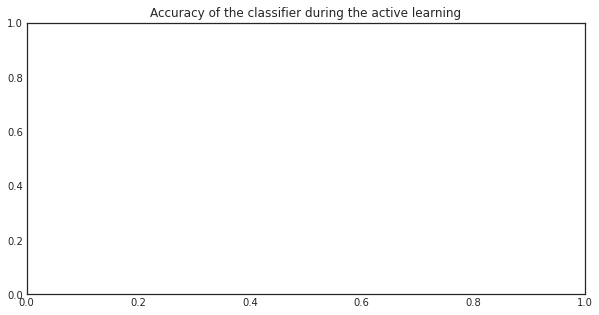

In [ ]:
#PLOT ACCURACY AS TIME PASSES
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()